# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston

Ele pretende comparar entre o modelo Regressão Linear Simples vs. Random Forest

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd

In [91]:
import numpy as np
import pandas as pd

In [92]:
df = pd.read_csv('housing.csv', sep=',', encoding='iso-8859-1')

In [93]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [94]:
df.shape

(489, 4)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

Verificar se existem Valores Missing (NAN)

In [95]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos.**

In [96]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [97]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Análise dos outliers**

In [98]:
import plotly.express as px

In [99]:
boxplot = px.box(df, y="RM")
boxplot.show()

In [100]:
boxplot = px.box(df, y="LSTAT")
boxplot.show()

In [101]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

In [102]:
boxplot = px.box(df, y="MEDV")
boxplot.show()

## **CORRELAÇÃO LINEAR**

In [103]:
import matplotlib.pyplot as plt

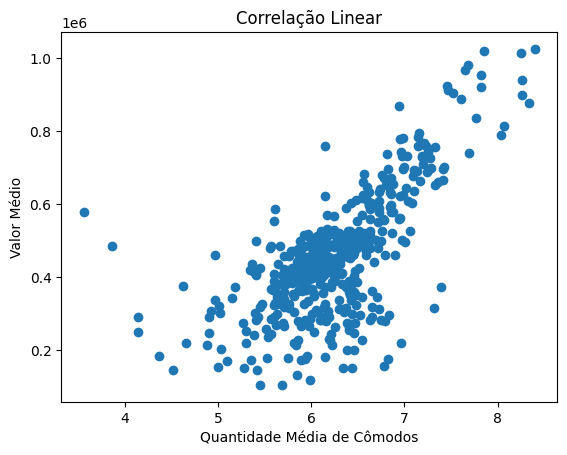

In [104]:
plt.scatter(df.RM, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(False)

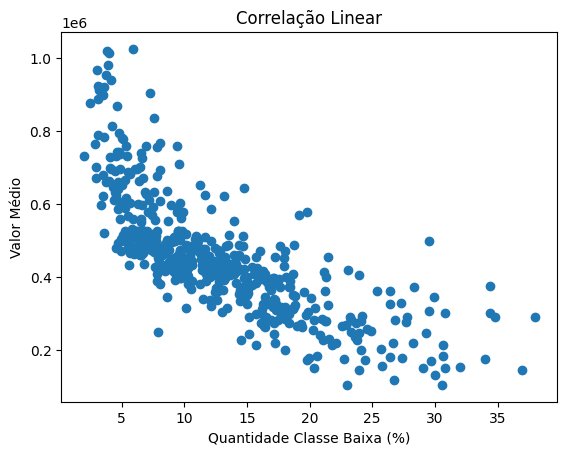

In [105]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Classe Baixa (%)')
plt.ylabel('Valor Médio')
plt.grid(False)


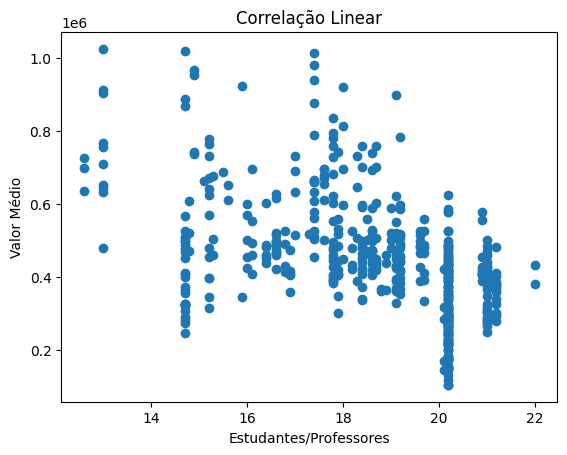

In [106]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Estudantes/Professores')
plt.ylabel('Valor Médio')
plt.grid(False)

### Análise da Normalidade

Gráfico QQ-Plot

In [107]:
import scipy.stats as stats

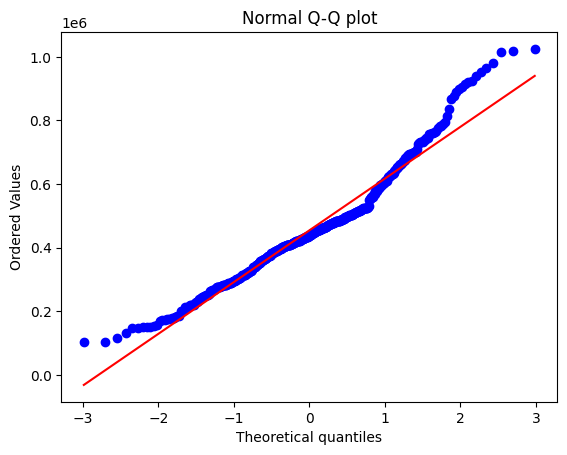

In [108]:
stats.probplot(df['MEDV'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [109]:
import plotly.express as px

In [110]:
hist =  px.histogram (df,  x = "MEDV", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

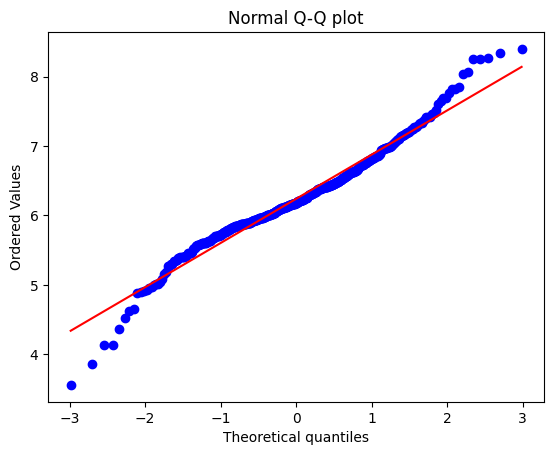

In [111]:
stats.probplot(df['RM'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [112]:
hist =  px.histogram (df,  x = "RM", nbins=40) 
hist.update_layout(width=800,height=500,title_text='Quantidade de cômodos') 
hist.show()

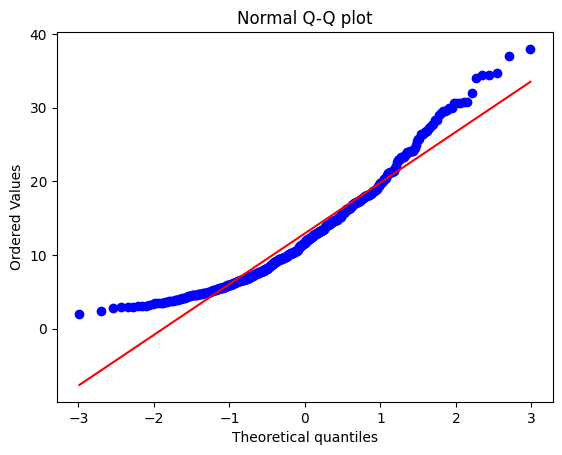

In [113]:
stats.probplot(df['LSTAT'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [114]:
hist =  px.histogram (df,  x = "LSTAT", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Quantidade de Classe Baixa (%)') 
hist.show()

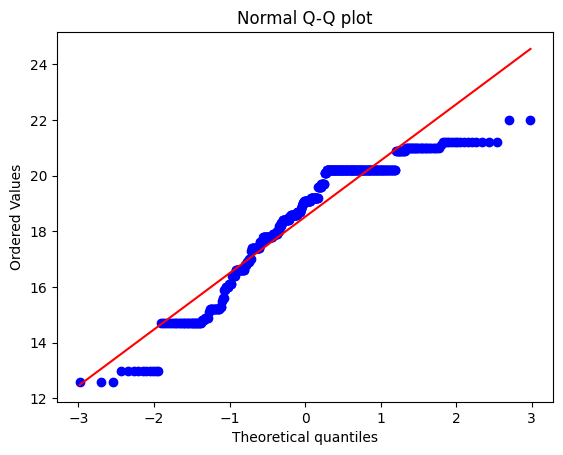

In [115]:
stats.probplot(df['PTRATIO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [116]:
hist =  px.histogram (df,  x = "PTRATIO", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Relação Estudantes/Professores') 
hist.show()

# Verificando por testes se a distribuição é normal ou não

## Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [117]:
stats.shapiro(df.MEDV)

ShapiroResult(statistic=0.9596619009971619, pvalue=2.5762864064304836e-10)

In [118]:
estatistica, p = stats.shapiro(df.MEDV)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9596619009971619
p-valor: 2.5762864064304836e-10


In [119]:
estatistica, p = stats.shapiro(df.RM)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9708166718482971
p-valor: 2.7085933496096004e-08


In [120]:
estatistica, p = stats.shapiro(df.LSTAT)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9371760487556458
p-valor: 1.6900520425407878e-13


In [121]:
estatistica, p = stats.shapiro(df.PTRATIO)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9064800143241882
p-valor: 9.07583957756611e-17


Vemos aqui nesse teste que a distribuição não é normal

# Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [122]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [123]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.11370576407672117
p-valor: 0.0009999999999998899


In [124]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.06394344399233598
p-valor: 0.0009999999999998899


In [125]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.LSTAT, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.0880483807304932
p-valor: 0.0009999999999998899


In [126]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.PTRATIO, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.17592642312750062
p-valor: 0.0009999999999998899


Vemos aqui nesse teste que a distribuição não é normal

### Correlação Linear

Após descobrir se a distribuição é normal ou não. Usamos os seguintes métodos para seguir:

Pearson para distribuição normal

Spearman para distribuição não normal

Kendall para distribuição não normal com quantidade pequena de amostras


Com isso, seguiremos utilizando o Spearman

Para base dos cálculos:

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [127]:
# Spearman
coef,p = stats.spearmanr(df.MEDV, df.RM)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.6240572939087418
p-valor: 3.8450286343433253e-54


In [128]:
correlacoes = df.corr(method='spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


## **REGRESSÃO LINEAR SIMPLES**

### Valor médio (MEDV) em função da classe social (LSTAT)

In [129]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [130]:
x_lstat = df.iloc[:,1:2].values
print(x_lstat[:2])

[[4.98]
 [9.14]]


In [131]:
y = df.iloc[:, 3].values
print(y[:2])

[504000. 453600.]


In [132]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x_lstat, y, test_size = 0.3, random_state = 10)

In [133]:
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [134]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [135]:
from sklearn.linear_model import LinearRegression
reg_linear = LinearRegression()
reg_linear.fit(x_treino, y_treino)

LinearRegression()

In [136]:
# Intercepto (coeficiente linear)
reg_linear.intercept_

681977.7451055486

In [137]:
# Coeficiente Angular
reg_linear.coef_

array([-17263.75010515])

**Equação: Valor = 681977,75 - 17263,75.LSTAT**

In [138]:
# Coeficiente de Determinação dados de treino
reg_linear.score(x_treino, y_treino)

0.5688289563355992

In [139]:
previsoes_treino = reg_linear.predict(x_treino)
print(previsoes_treino[:2])

[549564.78179906 401787.080899  ]


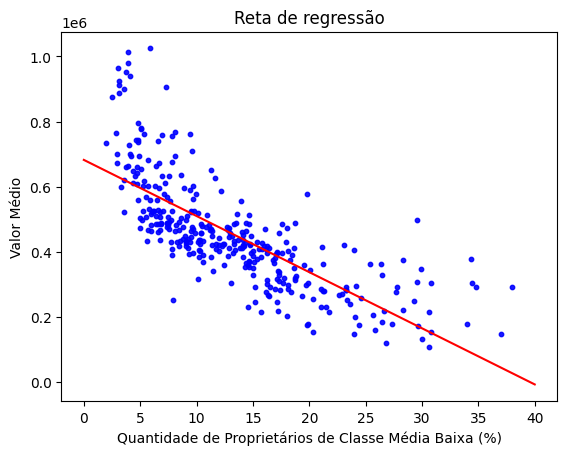

In [140]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear.coef_ + reg_linear.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [141]:
previsoes_teste = reg_linear.predict(x_teste)
print(previsoes_teste[:2])

[507441.2315425  438731.50612401]


In [142]:
print(y_teste[:2])

[487200. 428400.]


In [143]:
# Coeficiente de Determinação dados de teste
reg_linear.score(x_teste, y_teste)

0.6006038196307664

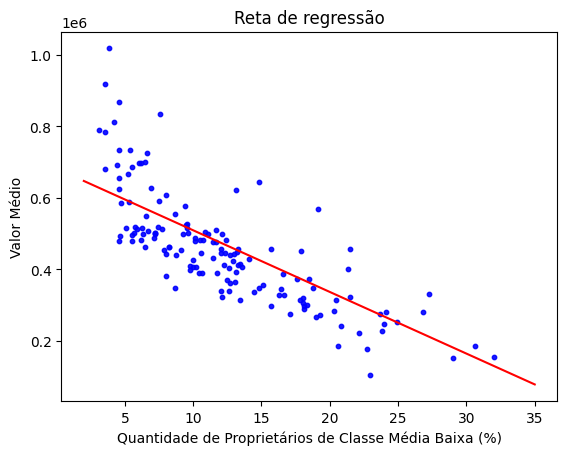

In [144]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear.coef_ + reg_linear.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [145]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear.predict([[25]])
valor_casa

array([250383.99247685])

**Métricas de Desempenho**

In [146]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

76340.55192245146

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [148]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

76340.55192245146

In [149]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

9863567949.634668

In [150]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

99315.49702657017

### **Validação Cruzada**

In [151]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [152]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [153]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x_lstat, y, cv = kfold)
resultado

array([0.73997836, 0.52496442, 0.2753212 , 0.77336843, 0.7096672 ,
       0.34726472, 0.66194425, 0.68820343, 0.411042  , 0.5519506 ,
       0.5776707 , 0.37648029, 0.60443851, 0.64797086, 0.5056103 ])

In [154]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coef. determinação Médio: 55.97%


## **REGRESSÃO COM RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

In [155]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [156]:
independente = df.iloc[:, 0:3].values
print(independente[:2])

[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]]


In [157]:
independente.shape

(489, 3)

In [158]:
dependente = df.iloc[:, 3].values
print(dependente[:2])

[504000. 453600.]


In [159]:
dependente.shape

(489,)

In [160]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [161]:
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [162]:
y_treino.shape, y_teste.shape

((342,), (147,))

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(x_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=60, random_state=10)

In [165]:
random.score(x_treino, y_treino)

0.9160346630571496

**TESTE**

In [166]:
random.score(x_teste, y_teste)

0.8465287311346861

In [167]:
previsoes_teste = random.predict(x_teste)
print(previsoes_teste[:2])

[429790.1184383  626425.24570752]


In [168]:
print(y_teste[:2])

[417900. 632100.]


**MÉTRICAS**

In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [170]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

49730.29595322481

In [171]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

4452803054.515374

In [172]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

66729.326795011

### **Validação Cruzada**

In [173]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [174]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [175]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

array([0.9390087 , 0.9048205 , 0.78576987, 0.78178487, 0.80471035,
       0.73189206, 0.88019637, 0.85442545, 0.7796746 , 0.82002933,
       0.93538902, 0.72717569, 0.80683864, 0.8863317 , 0.78974059])

In [176]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

Coeficiente de Determinação Médio: 82.85%


**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

Portando, o melhor modelo entre os dois testados é o Random Forest